In [13]:
import pandas as pd

# Load your CSV dataset
data = pd.read_csv('final_shop_6modata2.csv')

# Quick look at data
print(data.head())
print(data.info())


                                 Ad Group Month  Impressions  Clicks   CTR  \
0    Shop - 1:1 - Desk - shop coupon code  July        16038    6504  0.41   
1         Shop - 1:1 - Desk - shop coupon  July        36462   14367  0.39   
2  Shop - 1:1 - Desk - shop discount code  July         3635    1458  0.40   
3     Shop - 1:1 - Desk - shop promo code  July        26185   10418  0.40   
4          Shop - 1:1 - Desk - shop promo  July          808     282  0.35   

   Conversions  Conv Rate   Cost   CPC  Revenue  Sale Amount      P&L  
0         1166       0.10   6669  1.03     6402    136770.05 -267.086  
1         2188       0.09  13746  0.96    13262    283215.21 -483.951  
2          248       0.09   1606  1.10     1723     39165.46  117.136  
3         2294       0.12  13278  1.27    13042    284823.48 -235.921  
4           61       0.15    391  1.39      337      7717.77  -53.604  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 190 entries, 0 to 189
Data columns (total 12 colu

In [15]:
data['CPA'] = data['Cost'] / data['Conversions']
data['ROAS'] = data['Revenue'] / data['Cost']
data['CPM'] = (data['Cost'] / data['Impressions']) * 1000
data['RevenuePerClick'] = data['Revenue'] / data['Clicks']
print(data.head())

                                 Ad Group Month  Impressions  Clicks   CTR  \
0    Shop - 1:1 - Desk - shop coupon code  July        16038    6504  0.41   
1         Shop - 1:1 - Desk - shop coupon  July        36462   14367  0.39   
2  Shop - 1:1 - Desk - shop discount code  July         3635    1458  0.40   
3     Shop - 1:1 - Desk - shop promo code  July        26185   10418  0.40   
4          Shop - 1:1 - Desk - shop promo  July          808     282  0.35   

   Conversions  Conv Rate   Cost   CPC  Revenue  Sale Amount      P&L  \
0         1166       0.10   6669  1.03     6402    136770.05 -267.086   
1         2188       0.09  13746  0.96    13262    283215.21 -483.951   
2          248       0.09   1606  1.10     1723     39165.46  117.136   
3         2294       0.12  13278  1.27    13042    284823.48 -235.921   
4           61       0.15    391  1.39      337      7717.77  -53.604   

        CPA      ROAS         CPM  RevenuePerClick  
0  5.719554  0.959964  415.824916      

In [17]:
# Split Ad Group to extract parts
split_columns = data['Ad Group'].str.extract(r'(.+?) - (.+?) - (.+?) - (.+?)')
split_columns.columns = ['Campaign Type', 'Audience', 'Device', 'Campaign Name']

# Drop the 'Audience' column
split_columns = split_columns.drop(columns='Audience')

# Join the remaining split columns back to the original DataFrame (optional: drop original Ad Group)
data_cleaned = pd.concat([data.drop(columns='Ad Group'), split_columns], axis=1)

# Show the first few rows to confirm
data_cleaned.head()

,Month,Impressions,Clicks,CTR,Conversions,Conv Rate,Cost,CPC,Revenue,Sale Amount,P&L,CPA,ROAS,CPM,RevenuePerClick,Campaign Type,Device,Campaign Name
0,July,16038,6504,0.41,1166,0.10,6669,1.03,6402,136770.05,-267.086,5.719554,0.959964,415.824916,0.984317,Shop,Desk,s
1,July,36462,14367,0.39,2188,0.09,13746,0.96,13262,283215.21,-483.951,6.282450,0.964790,376.995228,0.923088,Shop,Desk,s
2,July,3635,1458,0.40,248,0.09,1606,1.10,1723,39165.46,117.136,6.475806,1.072852,441.815681,1.181756,Shop,Desk,s
3,July,26185,10418,0.40,2294,0.12,13278,1.27,13042,284823.48,-235.921,5.788143,0.982226,507.084209,1.251872,Shop,Desk,s
4,July,808,282,0.35,61,0.15,391,1.39,337,7717.77,-53.604,6.409836,0.861893,483.910891,1.195035,Shop,Desk,s


In [19]:
X = data_cleaned[['Impressions', 'Conversions','Clicks', 'Cost']]
y = data_cleaned['Revenue']

In [21]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)


In [23]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [25]:
from sklearn.metrics import mean_squared_error, r2_score
y_pred = model.predict(X_test)
print("R2:", r2_score(y_test, y_pred))
print("RMSE:", mean_squared_error(y_test, y_pred, squared=False))


R2: 0.9981946020807309
RMSE: 245.2894426839908


C:\Users\kinsh\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


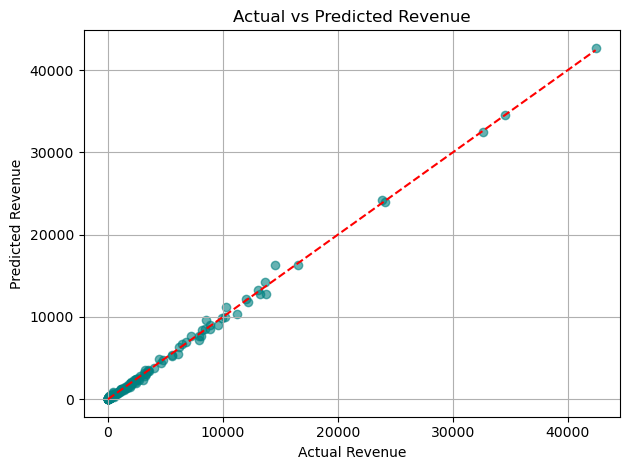

In [31]:
#Visualize Actual vs Predicted
#Helps see how far off your predictions are:
import matplotlib.pyplot as plt

y_pred = model.predict(X)

plt.scatter(y, y_pred, alpha=0.6, color='teal')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')
plt.xlabel('Actual Revenue')
plt.ylabel('Predicted Revenue')
plt.title('Actual vs Predicted Revenue')
plt.grid(True)
plt.tight_layout()
plt.show()


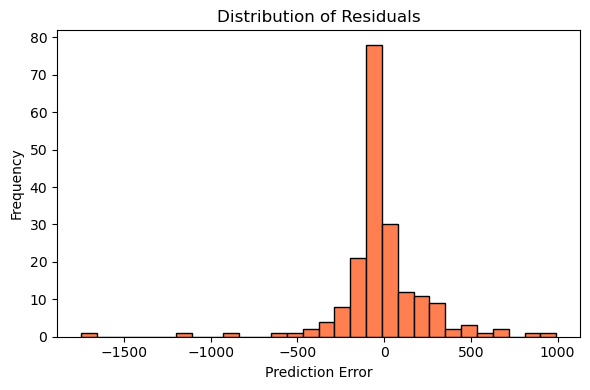

In [35]:
residuals = y - y_pred

plt.figure(figsize=(6, 4))
plt.hist(residuals, bins=30, color='coral', edgecolor='black')
plt.title('Distribution of Residuals')
plt.xlabel('Prediction Error')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()


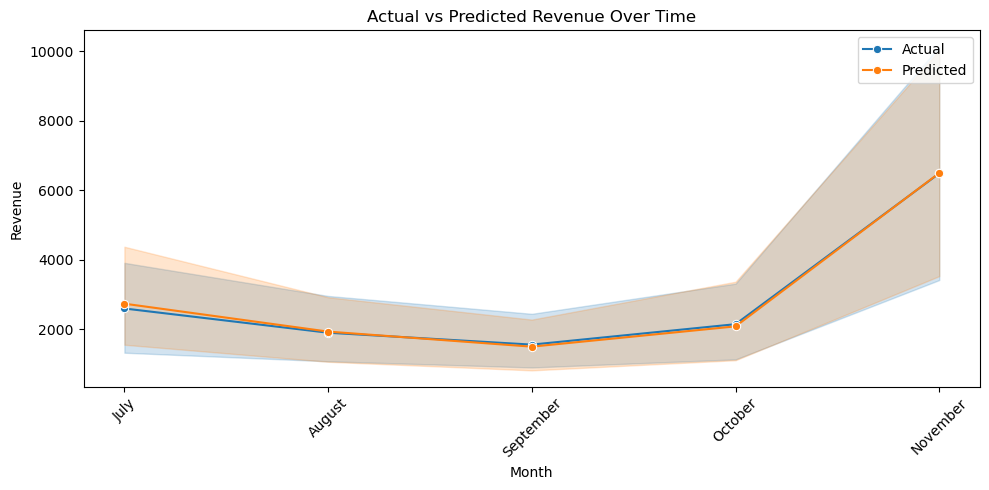

In [37]:
data_cleaned_plot = data_cleaned.copy()
data_cleaned_plot['Predicted Revenue'] = y_pred
data_cleaned_plot['Month'] = data_cleaned_plot['Month'].astype(str)

import seaborn as sns

plt.figure(figsize=(10, 5))
sns.lineplot(x='Month', y='Revenue', data=data_cleaned_plot, label='Actual', marker='o')
sns.lineplot(x='Month', y='Predicted Revenue', data=data_cleaned_plot, label='Predicted', marker='o')
plt.xticks(rotation=45)
plt.title('Actual vs Predicted Revenue Over Time')
plt.xlabel('Month')
plt.ylabel('Revenue')
plt.legend()
plt.tight_layout()
plt.show()


In [65]:
import pandas as pd

# Ensure column names & order match exactly with X
future_inputs = pd.DataFrame([{
    'Impressions': 150000,
    'Clicks': 6000,
    'Conversions': 1000,
    'Cost': 30000
}])[X.columns]  # This guarantees correct order

# Now predict using your model
predicted_revenue = model.predict(future_inputs)

print(f"📈 Expected Revenue: ₹{predicted_revenue[0]:,.2f}")


📈 Expected Revenue: ₹12,537.76
